In [286]:
import yfinance as yF
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from functools import reduce

In [287]:
stock_list = ['QQQ', 'DIA', 'SPY', 'AGG', 'JPST']
print('stock_list:', stock_list)

stock_list: ['QQQ', 'DIA', 'SPY', 'AGG', 'JPST']


In [306]:
data1 = yF.download(stock_list, start="2022-01-01", end="2022-05-01", interval ="1mo")

[*********************100%***********************]  5 of 5 completed


In [307]:
data1.drop(['Open','High','Low','Adj Close','Volume'], axis=1, inplace=True)

In [308]:
data1

Close                                               
                   AGG         DIA       JPST         QQQ         SPY
Date                                                                 
2022-01-01  111.800003  351.079987  50.480000  363.049988  449.910004
2022-01-21         NaN         NaN        NaN         NaN         NaN
2022-02-01  110.360001  339.339996  50.365002  346.799988  436.630005
2022-02-18         NaN         NaN        NaN         NaN         NaN
2022-03-01  107.099998  346.829987  50.270000  362.540009  451.640015
2022-03-18         NaN         NaN        NaN         NaN         NaN
2022-03-21         NaN         NaN        NaN         NaN         NaN
2022-04-01  102.870003  329.690002  50.220001  313.250000  412.000000
2022-04-14         NaN         NaN        NaN         NaN         NaN
2022-05-01  101.570000  329.070007  50.169998  309.250000  411.339996

In [309]:
data1.columns = data1.columns.map(''.join).str.strip('')

In [310]:
data1 = data1.pct_change(1).mul(100)

In [311]:
data1

,CloseAGG,CloseDIA,CloseJPST,CloseQQQ,CloseSPY
Date,,,,,
2022-01-01,NaN,NaN,NaN,NaN,NaN
2022-01-21,0.000000,0.000000,0.000000,0.000000,0.000000
2022-02-01,-1.288016,-3.343965,-0.227809,-4.475968,-2.951701
2022-02-18,0.000000,0.000000,0.000000,0.000000,0.000000
2022-03-01,-2.953971,2.207223,-0.188625,4.538645,3.437695
2022-03-18,0.000000,0.000000,0.000000,0.000000,0.000000
2022-03-21,0.000000,0.000000,0.000000,0.000000,0.000000
2022-04-01,-3.949576,-4.941898,-0.099461,-13.595743,-8.776905
2022-04-14,0.000000,0.000000,0.000000,0.000000,0.000000


In [312]:
data1 = data1.replace(0, np.nan, inplace=False)

In [313]:
data1

,CloseAGG,CloseDIA,CloseJPST,CloseQQQ,CloseSPY
Date,,,,,
2022-01-01,NaN,NaN,NaN,NaN,NaN
2022-01-21,NaN,NaN,NaN,NaN,NaN
2022-02-01,-1.288016,-3.343965,-0.227809,-4.475968,-2.951701
2022-02-18,NaN,NaN,NaN,NaN,NaN
2022-03-01,-2.953971,2.207223,-0.188625,4.538645,3.437695
2022-03-18,NaN,NaN,NaN,NaN,NaN
2022-03-21,NaN,NaN,NaN,NaN,NaN
2022-04-01,-3.949576,-4.941898,-0.099461,-13.595743,-8.776905
2022-04-14,NaN,NaN,NaN,NaN,NaN


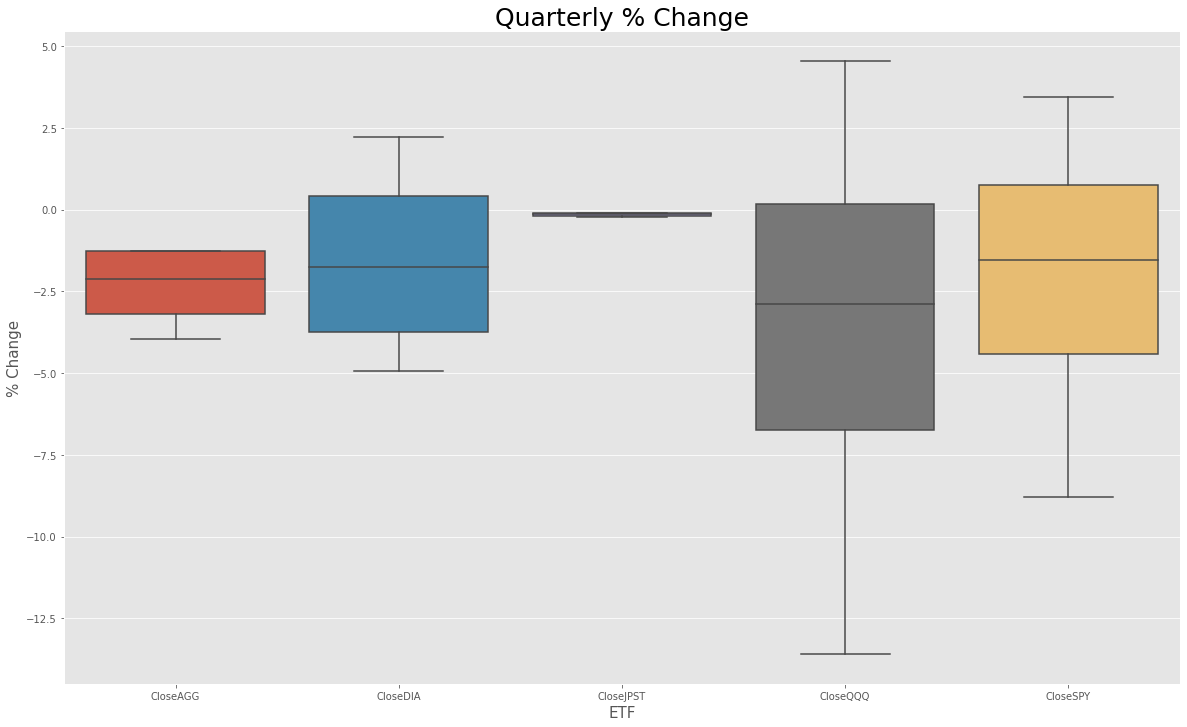

In [314]:
plt.figure(figsize = (20,12))
sns.boxplot(data=data1)
plt.title('Quarterly % Change', size=25)
plt.xlabel('ETF', size=15)
plt.ylabel('% Change', size=15)
plt.show()